Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



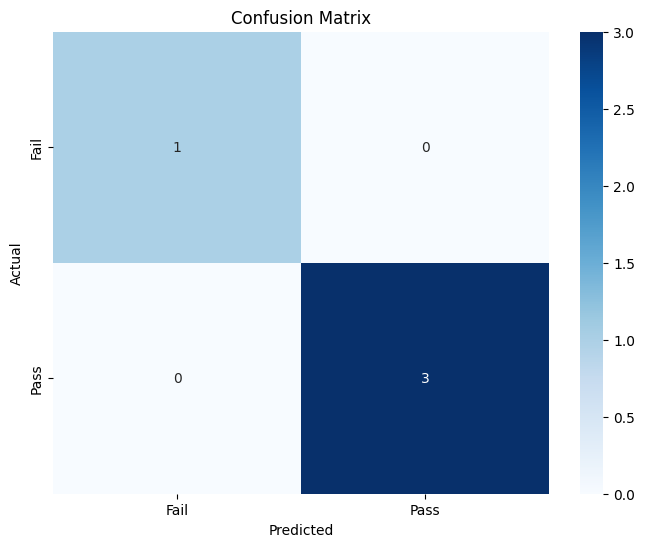

------Predict Your Result-------


Enter your study hours :  8
Enter your attendance :  80
Enter your past score :  92
Enter your sleep hours :  6


You are Pass 🥳🙌


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('Student_success_predict.csv')

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = df[features]
y = df['Passed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Classification Report')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('------Predict Your Result-------')

try:
    Study_Hours = float(input('Enter your study hours : '))
    Attendance = float(input('Enter your attendance : '))
    Past_Score = float(input('Enter your past score : '))
    Sleep_Hours = float(input('Enter your sleep hours : '))

    user_input_df = pd.DataFrame([{
        'StudyHours': Study_Hours,
        'Attendance': Attendance,
        'PastScore': Past_Score,
        'SleepHours': Sleep_Hours
    }])

    user_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_scaled)[0]

    if prediction == 1:
        print('You are Pass 🥳🙌')
    else:
        print('You are Fail ☹️😔')

except Exception as e:
    print('An error has occurred:', e)

   


